### License Plate Recognition using HAAR cascade classifiers 

In [1]:
# # show some images
# import os 
# path = 'D:\\projects\\car-license-plate-recognition\\'
# haar = 'config\\haarcascade_frontalface_default.xml'

# #  
# plates1 = ['doc\\problem\\placas\\040603\\P6040070.jpg']

# # inria_list = os.listdir(path)
# # print(len(inria_list), " train images")

# def draw_comparison_mats(mats, figsize=(12, 4), cmaps=None, interpolations=None):
#     fig = plt.figure(figsize=figsize)

#     for i, mat in enumerate(mats, start=1):
#         a = fig.add_subplot(1, len(mats), i)
#         a.set_title('image' + str(i))
#         # http://stackoverflow.com/a/14728122/2692914 (interpolation method)
#         if cmaps is None:
#             plt.imshow(mats[i - 1])
#         else:
#             if interpolations is None:
#                 plt.imshow(mats[i - 1], cmap=cmaps[i - 1])
#             else:
#                 plt.imshow(mats[i - 1], cmap=cmaps[i - 1], interpolation=interpolations[i - 1])

#     plt.show()

### Detection using trained HAAR cascade classifier

PATH	: D:\projects\car-license-plate-recognition\doc\problem\placas\040603\P1010002.jpg
SIZE	: (480, 640, 3)


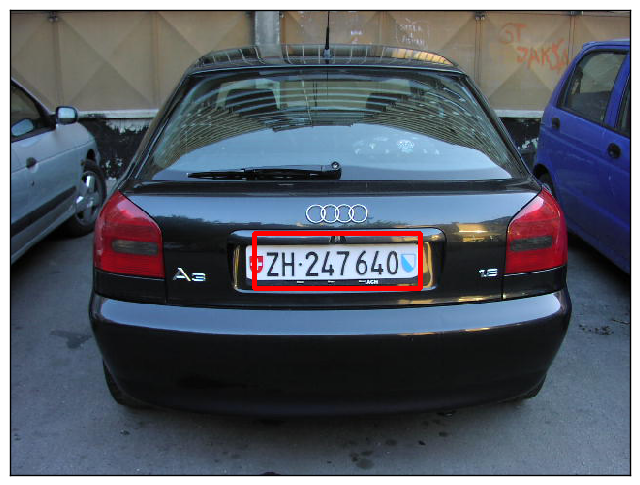

In [46]:
% matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import cv2

# HAAR classifier
haar_path = 'D:\\projects\\car-license-plate-recognition\\config\\haarcascade_russian_plate_number.xml'

# license plate is detected
img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P1010002.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040072.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\rus_p001am77.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040066.jpg"

# is not detected
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040070.jpg"
# img_path = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040034.jpg"

img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

print('PATH\t:', img_path)
print('SIZE\t:', img.shape)

cascade = cv2.CascadeClassifier(haar_path)
faces = cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),4)

plt.figure(figsize=(8, 8))
plt.imshow(img, interpolation='none')
plt.xticks([]), plt.yticks([])
plt.show()

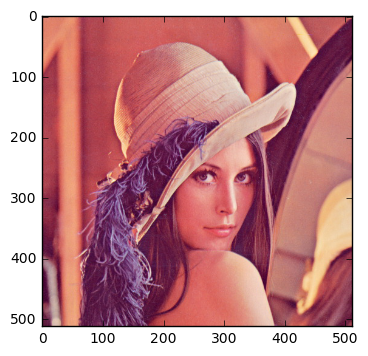

In [1]:
% matplotlib inline

import skimage.io
import matplotlib.pyplot as plt
image = skimage.io.imread('E:\\media\\OpenCV\\lena.jpg')
plt.imshow(image)
plt.show()

In [1]:
import pytesseract
from PIL import Image
print(pytesseract.image_to_string(Image.open('D:\\projects\\car-license-plate-recognition\\doc\\problem\\some_text.png')))

I'm a normal text
I'm a bold text


{'data_type': 'alpr_results',
 'epoch_time': 1492266740000,
 'img_height': 480,
 'img_width': 640,
 'processing_time_ms': 46.514999,
 'regions_of_interest': [],
 'results': [{'candidates': [{'confidence': 89.400139,
                              'matches_template': 0,
                              'plate': 'ZG8481L'},
                             {'confidence': 87.216301,
                              'matches_template': 0,
                              'plate': 'Z68481L'},
                             {'confidence': 83.263939,
                              'matches_template': 0,
                              'plate': 'ZB8481L'},
                             {'confidence': 83.029732,
                              'matches_template': 0,
                              'plate': 'ZG881L'},
                             {'confidence': 81.925011,
                              'matches_template': 0,
                              'plate': 'ZG8A81L'}],
              'confidence': 89.400139,
     

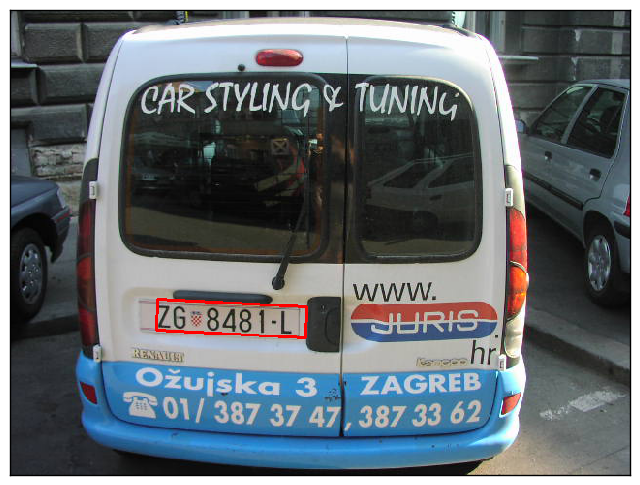

In [10]:
% matplotlib inline

from openalpr import Alpr
import cv2
import matplotlib.pyplot as plt

alpr_home = 'c:\\OpenALPR\\openalpr_64\\'
plate_image = 'D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P1010002.jpg'
plate_image = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040070.jpg"
# plate_image = "D:\\projects\\car-license-plate-recognition\\doc\\problem\\placas\\040603\\P6040034.jpg"

alpr = Alpr('eu', alpr_home + 'openalpr.conf', alpr_home + 'runtime_data')
alpr.is_loaded()

alpr.set_top_n(5)
alpr.set_default_region("wa")
alpr.set_detect_region(False)
jpeg_bytes = open(plate_image, "rb").read()
results = alpr.recognize_array(jpeg_bytes)

import pprint
pprint.pprint(results)

if len(results['results']) > 0:
    coordinates = results['results'][0]['coordinates']

    img = cv2.imread(plate_image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    print('PATH\t:', plate_image)
    print('SIZE\t:', img.shape)
    print('COORDS\t:', coordinates)

    p0 = (coordinates[0]['x'], coordinates[0]['y'])
    p1 = (coordinates[1]['x'], coordinates[1]['y'])
    p2 = (coordinates[2]['x'], coordinates[2]['y'])
    p3 = (coordinates[3]['x'], coordinates[3]['y'])

    img = cv2.line(img, p0, p1, (255, 0, 0), 2)
    img = cv2.line(img, p1, p2, (255, 0, 0), 2)
    img = cv2.line(img, p2, p3, (255, 0, 0), 2)
    img = cv2.line(img, p3, p0, (255, 0, 0), 2)

    plt.figure(figsize=(8, 8))
    plt.imshow(img, interpolation='none')
    plt.xticks([]), plt.yticks([])
    plt.show()